# **KNN**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Cargar Datos

In [ ]:
datos = pd.read_csv("penguins_size.csv")

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
datos.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [ ]:
# Porcentaje de eliminados
print('Porcentaje de datos a eliminar: %.2f %%' % (10/344*100))

Porcentaje de datos a eliminar: 2.91 %


In [ ]:
datos = datos.dropna()

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [ ]:
datos['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [ ]:
datos['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [ ]:
datos['sex'].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [ ]:
a = datos[datos['sex']=='.']

In [ ]:
print(a)

    species  island  culmen_length_mm  ...  flipper_length_mm  body_mass_g  sex
336  Gentoo  Biscoe              44.5  ...              217.0       4875.0    .

[1 rows x 7 columns]


In [ ]:
datos = datos[datos['sex']!='.']

In [ ]:
datos['sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

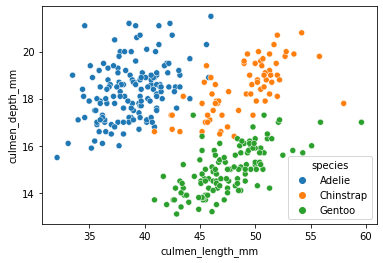

In [ ]:
sns.scatterplot( x = "culmen_length_mm" , y = "culmen_depth_mm", hue="species" , data=datos)

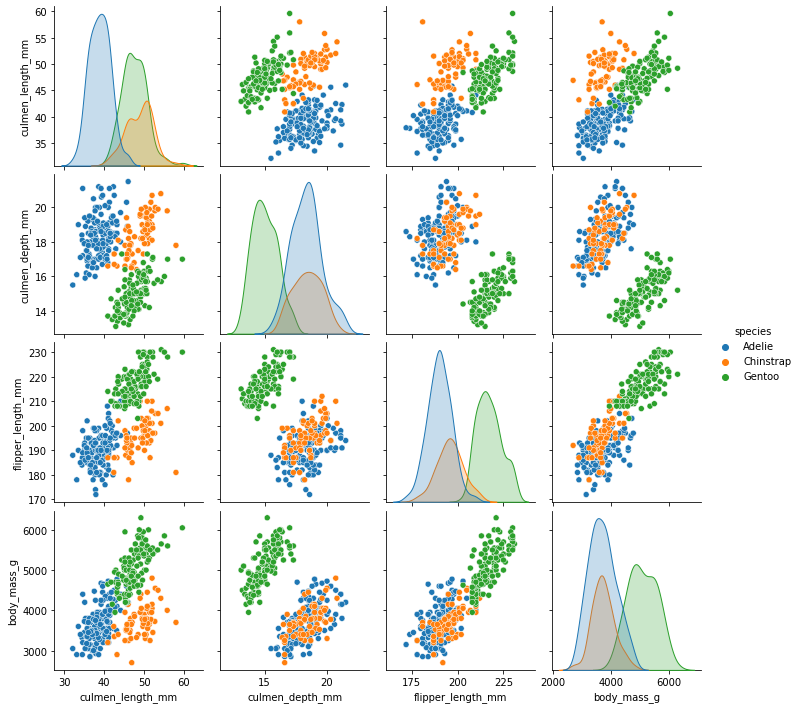

In [ ]:
sns.pairplot(datos , hue='species')

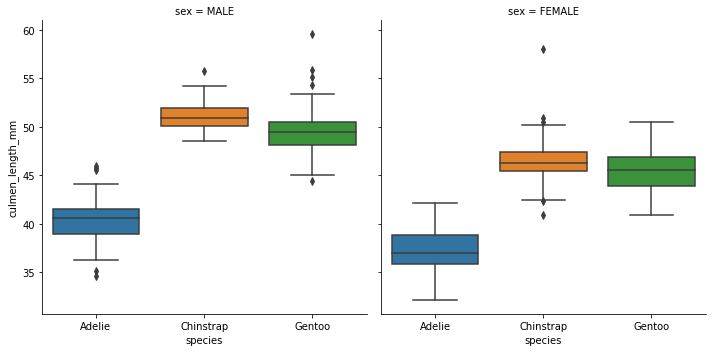

In [ ]:
sns.catplot( x = "species" , y = "culmen_length_mm",data=datos, kind="box" , col="sex")

### Ingenieria de Caracteristicas

In [ ]:
pd.get_dummies(datos)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,1,0,0,0,0,1,0,1
1,39.5,17.4,186.0,3800.0,1,0,0,0,0,1,1,0
2,40.3,18.0,195.0,3250.0,1,0,0,0,0,1,1,0
4,36.7,19.3,193.0,3450.0,1,0,0,0,0,1,1,0
5,39.3,20.6,190.0,3650.0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0,0,1,1,0,0,1,0
340,46.8,14.3,215.0,4850.0,0,0,1,1,0,0,1,0
341,50.4,15.7,222.0,5750.0,0,0,1,1,0,0,0,1
342,45.2,14.8,212.0,5200.0,0,0,1,1,0,0,1,0


In [ ]:
pd.get_dummies(datos.drop('species',axis=1))

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,0,0,1,0,1
1,39.5,17.4,186.0,3800.0,0,0,1,1,0
2,40.3,18.0,195.0,3250.0,0,0,1,1,0
4,36.7,19.3,193.0,3450.0,0,0,1,1,0
5,39.3,20.6,190.0,3650.0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,1,0,0,1,0
340,46.8,14.3,215.0,4850.0,1,0,0,1,0
341,50.4,15.7,222.0,5750.0,1,0,0,0,1
342,45.2,14.8,212.0,5200.0,1,0,0,1,0


In [ ]:
pd.get_dummies(datos.drop('species',axis=1),drop_first=True)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1,1
1,39.5,17.4,186.0,3800.0,0,1,0
2,40.3,18.0,195.0,3250.0,0,1,0
4,36.7,19.3,193.0,3450.0,0,1,0
5,39.3,20.6,190.0,3650.0,0,1,1
...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0,0,0
340,46.8,14.3,215.0,4850.0,0,0,0
341,50.4,15.7,222.0,5750.0,0,0,1
342,45.2,14.8,212.0,5200.0,0,0,0


### Division de los datos en conjunto de entrenamiento y prueba

In [ ]:
X = pd.get_dummies(datos.drop('species',axis=1),drop_first=True)
y = datos['species']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test , y_train , y_test = train_test_split(X,y,test_size=0.30,random_state=101)

### Modelo de Regresion Logistica Multinomial con solver newton-cg modelo1

In [ ]:
from sklearn.linear_model import LogisticRegression 

In [ ]:
modelo1 = LogisticRegression(multi_class='multinomial',solver='newton-cg',max_iter=1000 )

In [ ]:
modelo1.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


LogisticRegression(max_iter=1000, multi_class='multinomial', solver='newton-cg')

### Predicciones

In [ ]:
predicciones1 = modelo1.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test,predicciones1)

array([[40,  0,  0],
       [ 0, 26,  1],
       [ 0,  0, 33]])

In [ ]:
from sklearn.metrics import plot_confusion_matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


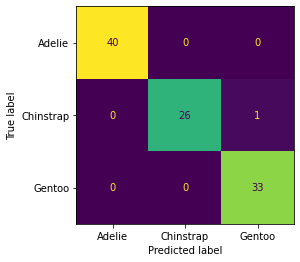

In [ ]:
plot_confusion_matrix(modelo1,X_test,y_test,colorbar=False)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predicciones1))

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        40
   Chinstrap       1.00      0.96      0.98        27
      Gentoo       0.97      1.00      0.99        33

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



### Modelo de Regresion Logistica Multinomial con solver lbfgs modelo2

In [ ]:
modelo2 = LogisticRegression(multi_class='multinomial',solver='lbfgs',max_iter=1000 )

In [ ]:
modelo2.fit(X_train,y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial')

### Evaluacion del modelo

In [ ]:
predicciones2= modelo2.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


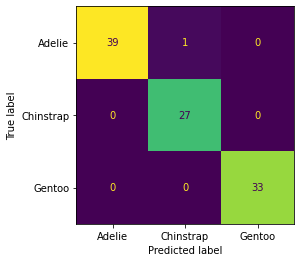

In [ ]:
plot_confusion_matrix(modelo2,X_test,y_test,colorbar=False)

In [ ]:
confusion_matrix(y_test,predicciones2)

array([[39,  1,  0],
       [ 0, 27,  0],
       [ 0,  0, 33]])

In [ ]:
print(classification_report(y_test,predicciones2))

              precision    recall  f1-score   support

      Adelie       1.00      0.97      0.99        40
   Chinstrap       0.96      1.00      0.98        27
      Gentoo       1.00      1.00      1.00        33

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100

